In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from fuzzywuzzy import fuzz
from sklearn.metrics import accuracy_score

names1 = ['a', 'bbb', 'bba', 'cccce']
names2 = ['a', 'bbb', 'bba',  'ccccd']

,truths,similarities,inps_names1,inps_names2
0,True,1.00,a,a
1,False,0.00,a,bbb
2,False,0.50,a,bba
3,False,0.00,a,ccccd
4,False,0.00,bbb,a
5,True,1.00,bbb,bbb
6,False,0.67,bbb,bba
7,False,0.00,bbb,ccccd
8,False,0.50,bba,a
9,False,0.67,bba,bbb


In [5]:
def similarity_method_fuzzy(a, b):
    #return fuzz.partial_ratio(a, b) / 100.0
    return fuzz.ratio(a, b) / 100.0
    
def similarity_method_dumb(a, b):
    return float(a==b)

similarity_method = similarity_method_fuzzy

def generate_similarities(names1, names2):
    truths = []
    similarities = []
    inps_names1 = []
    inps_names2 = []
    for idx1 in range(len(names1)):
        for idx2 in range(len(names2)):
            truth = idx1 == idx2
            truths.append(truth)
            similarity = similarity_method(names1[idx1], names2[idx2])
            similarities.append(similarity)
            inps_names1.append(names1[idx1])
            inps_names2.append(names2[idx2])

    df_similarities = pd.DataFrame({'truths': truths, 'similarities': similarities,
                                    'inps_names1': inps_names1, 'inps_names2': inps_names2})
    return df_similarities
df_similarities = generate_similarities(names1, names2)
df_similarities

,truths,similarities,inps_names1,inps_names2
0,True,1.00,a,a
1,False,0.00,a,bbb
2,False,0.50,a,bba
3,False,0.00,a,ccccd
4,False,0.00,bbb,a
5,True,1.00,bbb,bbb
6,False,0.67,bbb,bba
7,False,0.00,bbb,ccccd
8,False,0.50,bba,a
9,False,0.67,bba,bbb


In [6]:
df_similarities.pivot(index='inps_names1', columns='inps_names2', values='similarities')

inps_names2,a,bba,bbb,ccccd
inps_names1,,,,
a,1.0,0.50,0.00,0.0
bba,0.5,1.00,0.67,0.0
bbb,0.0,0.67,1.00,0.0
cccce,0.0,0.00,0.00,0.8


Text(0.5,1,'Best threshold: 0.70')

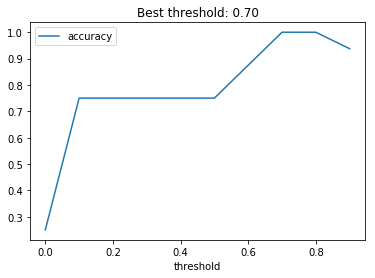

In [14]:
results = []
for threshold in np.arange(0, 1, 0.1):
    truths = df_similarities.truths
    predictions = df_similarities.similarities >= threshold
    accuracy = accuracy_score(truths, predictions)
    results.append({'accuracy': accuracy, 'threshold': threshold})
df_results = pd.DataFrame(results).set_index("threshold")
ax = df_results.plot()
best_threshold = df_results.accuracy.idxmax()
ax.set_title(f"Best threshold: {best_threshold:0.2f}")

In [15]:
mask = df_similarities.similarities >= 0.7
df_similarities[mask]

,truths,similarities,inps_names1,inps_names2
0,True,1.0,a,a
5,True,1.0,bbb,bbb
10,True,1.0,bba,bba
15,True,0.8,cccce,ccccd
